In [3]:
# Import relevant modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
from helper_functions.utils import *

TRAIN_IMGS_DIR = "../data/train"

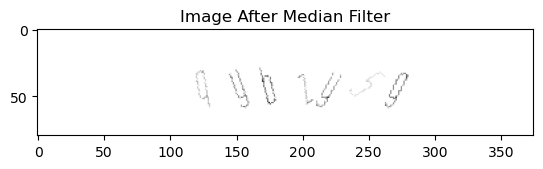

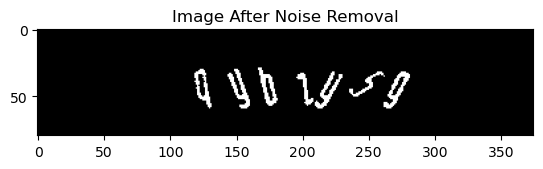

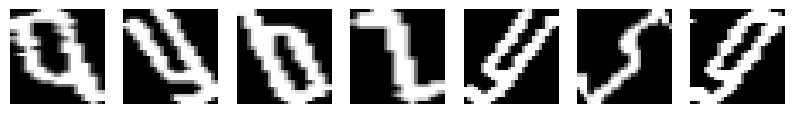

In [4]:
from helper_functions.preprocessing import replace_black_with_median

# Load the image
image = cv2.imread("../data/train/boan/qybzy5g-0.png")

denoised = replace_black_with_median(image)

# Convert to grayscale
gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY) 

# sharp = cv2.Laplacian(denoised, cv2.CV_64F)
# sharp = cv2.convertScaleAbs(sharp)
# enhanced = cv2.addWeighted(denoised, 1.5, sharp, -0.5, 0)

plt.imshow(gray, cmap='gray')
plt.title("Image After Median Filter")
plt.show()

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 31, 2)

plt.imshow(thresh, cmap='gray')
plt.title("Image After Noise Removal")
plt.show()

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (likely noise)
filtered_contours = [c for c in contours if cv2.contourArea(c) > 0]

# Sort contours from left to right
filtered_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[0])

# Process each character
characters = []
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    char = thresh[y:y+h, x:x+w]
    char = cv2.resize(char, (28, 28))  # Resize to fit model input
    characters.append(char)

# Display the characters in the notebook
if len(characters) > 0:
    fig, axes = plt.subplots(1, len(characters), figsize=(10, 3))
    for i, char in enumerate(characters):
        axes[i].imshow(char, cmap='gray')
        axes[i].axis('off')
    plt.show()
else:
    print("No characters detected.")
